## Evaluación Bases de Datos No SQL

#### Importación de librerías

In [1]:
import pymongo as pym
import pandas as pd
import pprint as pp
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Conexión a la Base de Datos MongoDB

In [2]:
# Establecer conexión al cliente Mongo
client = pym.MongoClient('mongodb://localhost:27017')

# Creación de la Base de Datos
db = client['olympics']

# Creación de las colecciones
col1 = db['athletes']
col2 = db['noc']

#### Carga de dataset

In [3]:
df1 = pd.read_csv(r'athlete_events.csv')
df2 = pd.read_csv(r'noc_regions.csv')
data1 = df1.to_dict(orient = 'records')
data2 = df2.to_dict(orient = 'records')

#### Inserción de documentos en las colecciones athletes y noc

In [4]:
db.athletes.insert_many(data1)

In [5]:
db.noc.insert_many(data2)

#### Conteo de documentos

In [32]:
db.athletes.count_documents({})

271116

In [33]:
db.noc.count_documents({})

231

#### Visualizamos una muestra de las colecciones:

In [36]:
for doc in db.athletes.find({}).limit(5):
    pp.pprint(doc, sort_dicts=False)

{'_id': ObjectId('639e23735f892f3879b1e433'),
 'ID': 1,
 'Name': 'A Dijiang',
 'Sex': 'M',
 'Age': 24.0,
 'Height': 180.0,
 'Weight': 80.0,
 'Team': 'China',
 'NOC': 'CHN',
 'Games': '1992 Summer',
 'Year': 1992,
 'Season': 'Summer',
 'City': 'Barcelona',
 'Sport': 'Basketball',
 'Event': "Basketball Men's Basketball",
 'Medal': nan}
{'_id': ObjectId('639e23735f892f3879b1e434'),
 'ID': 2,
 'Name': 'A Lamusi',
 'Sex': 'M',
 'Age': 23.0,
 'Height': 170.0,
 'Weight': 60.0,
 'Team': 'China',
 'NOC': 'CHN',
 'Games': '2012 Summer',
 'Year': 2012,
 'Season': 'Summer',
 'City': 'London',
 'Sport': 'Judo',
 'Event': "Judo Men's Extra-Lightweight",
 'Medal': nan}
{'_id': ObjectId('639e23735f892f3879b1e435'),
 'ID': 3,
 'Name': 'Gunnar Nielsen Aaby',
 'Sex': 'M',
 'Age': 24.0,
 'Height': nan,
 'Weight': nan,
 'Team': 'Denmark',
 'NOC': 'DEN',
 'Games': '1920 Summer',
 'Year': 1920,
 'Season': 'Summer',
 'City': 'Antwerpen',
 'Sport': 'Football',
 'Event': "Football Men's Football",
 'Medal': nan

In [37]:
for doc in db.noc.find({}).limit(10):
    pp.pprint(doc, sort_dicts=False)

{'_id': ObjectId('639e238b5f892f3879b6073f'),
 'NOC': 'AFG',
 'region': 'Afghanistan',
 'notes': nan}
{'_id': ObjectId('639e238b5f892f3879b60740'),
 'NOC': 'AHO',
 'region': 'Curacao',
 'notes': 'Netherlands Antilles'}
{'_id': ObjectId('639e238b5f892f3879b60741'),
 'NOC': 'ALB',
 'region': 'Albania',
 'notes': nan}
{'_id': ObjectId('639e238b5f892f3879b60742'),
 'NOC': 'ALG',
 'region': 'Algeria',
 'notes': nan}
{'_id': ObjectId('639e238b5f892f3879b60743'),
 'NOC': 'AND',
 'region': 'Andorra',
 'notes': nan}
{'_id': ObjectId('639e238b5f892f3879b60744'),
 'NOC': 'ANG',
 'region': 'Angola',
 'notes': nan}
{'_id': ObjectId('639e238b5f892f3879b60745'),
 'NOC': 'ANT',
 'region': 'Antigua',
 'notes': 'Antigua and Barbuda'}
{'_id': ObjectId('639e238b5f892f3879b60746'),
 'NOC': 'ANZ',
 'region': 'Australia',
 'notes': 'Australasia'}
{'_id': ObjectId('639e238b5f892f3879b60747'),
 'NOC': 'ARG',
 'region': 'Argentina',
 'notes': nan}
{'_id': ObjectId('639e238b5f892f3879b60748'),
 'NOC': 'ARM',
 'r

#### Limpieza de dataset
#### Eliminar disciplinas que han tenido apariciones esporádicas (menos de 5)

In [8]:
fasegroup = {'$group': {'_id':{'event':'$Event', 'year':'$Year'}}}
fasecount = {'$group': {'_id':'$_id.event', 'participations':{'$sum':1}}}
faseout = {'$out': 'cat_participations'}
db.athletes.aggregate([fasegroup, fasecount, faseout])

In [9]:
for doc in db.cat_participations.find({}):
    pp.pprint(doc)

{'_id': 'Croquet Mixed Singles, Two Balls', 'participations': 1}
{'_id': "Swimming Men's 100 metres Breaststroke", 'participations': 13}
{'_id': "Wrestling Men's Lightweight, Freestyle", 'participations': 24}
{'_id': "Shooting Women's Air Pistol, 10 metres", 'participations': 8}
{'_id': "Ski Jumping Men's Large Hill, Individual", 'participations': 14}
{'_id': "Wrestling Men's Heavyweight, Freestyle", 'participations': 25}
{'_id': "Canoeing Women's Kayak Fours, 500 metres", 'participations': 9}
{'_id': "Rowing Women's Coxed Fours", 'participations': 4}
{'_id': "Judo Women's Half-Middleweight", 'participations': 7}
{'_id': "Gymnastics Men's Rope Climbing", 'participations': 5}
{'_id': "Wrestling Men's Middleweight A, Greco-Roman", 'participations': 1}
{'_id': "Alpine Skiing Men's Giant Slalom", 'participations': 17}
{'_id': "Athletics Men's Cross-Country, Individual", 'participations': 3}
{'_id': "Shooting Men's Rapid-Fire Pistol, 25 metres", 'participations': 17}
{'_id': "Sailing Men's 

In [10]:
faselookup = {'$lookup': {
                             'from': 'cat_participations',
                             'foreignField': '_id',
                             'localField': 'Event',
                             'as': 'categ_part'
                            }
                }
faseunwind = {'$unwind': '$categ_part'}
faseproject = {'$project': {
                            'athId': '$ID',
                            'name': '$Name',
                            'sex': '$Sex',
                            'age': '$Age',
                            'height': '$Height',
                            'weight': '$Weight',
                            'team': '$Team',
                            'noc': '$NOC',
                            'games': '$Games',
                            'year': '$Year',
                            'season': '$Season',
                            'city': '$City',
                            'sport': '$Sport',
                            'event': '$Event',
                            'medal': '$Medal',
                            'participations': '$categ_part.participations'
                            }
                    }
faseout = {'$out': 'athl_events'}
db.athletes.aggregate([faselookup, faseunwind, faseproject, faseout])

In [14]:
for doc in db.athl_events.find({}).limit(10):
    pp.pprint(doc, sort_dicts=False)

{'_id': ObjectId('6398fcd74377d7ad5dfab9fa'),
 'athId': 1,
 'name': 'A Dijiang',
 'sex': 'M',
 'age': 24.0,
 'height': 180.0,
 'weight': 80.0,
 'team': 'China',
 'noc': 'CHN',
 'games': '1992 Summer',
 'year': 1992,
 'season': 'Summer',
 'city': 'Barcelona',
 'sport': 'Basketball',
 'event': "Basketball Men's Basketball",
 'medal': nan,
 'participations': 19}
{'_id': ObjectId('6398fcd74377d7ad5dfab9fb'),
 'athId': 2,
 'name': 'A Lamusi',
 'sex': 'M',
 'age': 23.0,
 'height': 170.0,
 'weight': 60.0,
 'team': 'China',
 'noc': 'CHN',
 'games': '2012 Summer',
 'year': 2012,
 'season': 'Summer',
 'city': 'London',
 'sport': 'Judo',
 'event': "Judo Men's Extra-Lightweight",
 'medal': nan,
 'participations': 10}
{'_id': ObjectId('6398fcd74377d7ad5dfab9fc'),
 'athId': 3,
 'name': 'Gunnar Nielsen Aaby',
 'sex': 'M',
 'age': 24.0,
 'height': nan,
 'weight': nan,
 'team': 'Denmark',
 'noc': 'DEN',
 'games': '1920 Summer',
 'year': 1920,
 'season': 'Summer',
 'city': 'Antwerpen',
 'sport': 'Footba

#### Eliminar los documentos que cumplan la condición

In [11]:
filter = {'participations':{'$lt':5}}
db.athl_events.delete_many(filter)

In [12]:
for doc in db.athl_events.find({'participations':{'$lt':5}}):
    pp.pprint(doc, sort_dicts=False)

#### Actualización de valores NaN en campos age, height, weight

In [13]:
db.athl_events.update_many({'age':np.nan}, {'$set':{'age':None}})
db.athl_events.update_many({'height':np.nan}, {'$set':{'height':None}})
db.athl_events.update_many({'weight':np.nan}, {'$set':{'weight':None}})

In [16]:
for doc in db.athl_events.find({'age':None}).limit(10):
    pp.pprint(doc, sort_dicts=False)

{'_id': ObjectId('639e23735f892f3879b1e4c6'),
 'athId': 54,
 'name': 'Mohamed Jamshid Abadi',
 'sex': 'M',
 'age': None,
 'height': None,
 'weight': None,
 'team': 'Iran',
 'noc': 'IRI',
 'games': '1948 Summer',
 'year': 1948,
 'season': 'Summer',
 'city': 'London',
 'sport': 'Boxing',
 'event': "Boxing Men's Heavyweight",
 'medal': nan,
 'participations': 25}
{'_id': ObjectId('639e23735f892f3879b1e4cb'),
 'athId': 58,
 'name': 'Georgi Abadzhiev',
 'sex': 'M',
 'age': None,
 'height': None,
 'weight': None,
 'team': 'Bulgaria',
 'noc': 'BUL',
 'games': '1924 Summer',
 'year': 1924,
 'season': 'Summer',
 'city': 'Paris',
 'sport': 'Cycling',
 'event': "Cycling Men's Road Race, Individual",
 'medal': nan,
 'participations': 26}
{'_id': ObjectId('639e23735f892f3879b1e4cc'),
 'athId': 58,
 'name': 'Georgi Abadzhiev',
 'sex': 'M',
 'age': None,
 'height': None,
 'weight': None,
 'team': 'Bulgaria',
 'noc': 'BUL',
 'games': '1924 Summer',
 'year': 1924,
 'season': 'Summer',
 'city': 'Paris',

#### Actualizamos los valores en NaN en el campo region de la colección noc 

In [20]:
for doc in db.noc.find({'region': np.nan}):
    pp.pprint(doc, sort_dicts=False)

In [19]:
db.noc.update_many({'region': np.nan}, [{'$set': {'region':'$notes'}}])

#### Insertar un documento a la colección noc

In [21]:
db.noc.insert_one({'NOC':'TBD', 'region':'To be determined'})

In [22]:
for doc in db.noc.find({'NOC':'TBD'}):
    pp.pprint(doc, sort_dicts=False)


{'_id': ObjectId('639e2a095f892f3879b60825'),
 'NOC': 'TBD',
 'region': 'To be determined'}


#### Añadir campo noc:TBD a documentos que no lo tengan

In [23]:
db.athl_events.update_many({'noc': {'$exists':False}},[{'$set': {'noc':'TBD'}}])

In [24]:
for doc in db.athl_events.find({'noc':'TBD'}):
    pp.pprint(doc, sort_dicts=False)

#### Reorganizamos los documentos, de modo que los deportes/eventos de cada atleta correspondan a un documento anidado

In [25]:
fasegroup1 = { '$group': 
                    { '_id': 
                        {'athId': "$athId", 
                        'name': '$name', 
                        'sex': '$sex', 
                        'age': '$age', 
                        'height': '$height', 
                        'weight': '$weight',
                        'noc': '$noc',
                        'games': '$games',
                        'year': '$year',
                        'season': '$season',
                        'city': '$city',
                        'sport': '$sport'
                        }, 
                    'event': { '$addToSet':{'category':'$event', 'medal':'$medal', 'participations':'$participations'}}
                    }
                }
fasegroup2 = { '$group': 
                    { '_id': 
                        {'athId': '$_id.athId', 
                        'name': '$_id.name', 
                        'sex': '$_id.sex', 
                        'age': '$_id.age', 
                        'height': '$_id.height', 
                        'weight': '$_id.weight',
                        'noc': '$_id.noc',
                        'games': '$_id.games',
                        'year': '$_id.year',
                        'season': '$_id.season',
                        'city': '$_id.city'
                        }, 
                    'sport': {'$addToSet':{'sport':'$_id.sport', 'event':'$event'}},
                    'count': {'$sum':1}
                    }
                }
faseproject = {'$project': {'_id':0, 
                        'games': '$_id.games', 
                        'year': '$_id.year', 
                        'season': '$_id.season', 
                        'city': '$_id.city', 
                        'athId': "$_id.athId", 
                        'name': '$_id.name', 
                        'sex': '$_id.sex', 
                        'age': '$_id.age', 
                        'height': '$_id.height', 
                        'weight': '$_id.weight',
                        'noc': '$_id.noc',                        
                        'sport': '$sport',
                        'count': '$count',
                        }
            }   
faseout = { '$out': 'athl_events2' }
db.athl_events.aggregate([fasegroup1, fasegroup2, faseproject, faseout])

In [26]:
for doc in db.athl_events2.find({}).limit(10):
    pp.pprint(doc, sort_dicts=False)

{'_id': ObjectId('639e410c177d46f0195cedfd'),
 'games': '2008 Summer',
 'year': 2008,
 'season': 'Summer',
 'city': 'Beijing',
 'athId': 11126,
 'name': 'Irene Beyeler',
 'sex': 'F',
 'age': 22.0,
 'height': 164.0,
 'weight': 54.0,
 'noc': 'SUI',
 'sport': [{'sport': 'Shooting',
            'event': [{'category': "Shooting Women's Air Rifle, 10 metres",
                       'medal': nan,
                       'participations': 9},
                      {'category': "Shooting Women's Small-Bore Rifle, Three "
                                   'Positions, 50 metres',
                       'medal': nan,
                       'participations': 9}]}],
 'count': 1}
{'_id': ObjectId('639e410c177d46f0195cedfe'),
 'games': '2004 Summer',
 'year': 2004,
 'season': 'Summer',
 'city': 'Athina',
 'athId': 5854,
 'name': 'Loc Attely',
 'sex': 'M',
 'age': 26.0,
 'height': 178.0,
 'weight': 84.0,
 'noc': 'FRA',
 'sport': [{'sport': 'Fencing',
            'event': [{'category': "Fencing Men's Fo

#### LOOKUP de athl_events2 con noc

In [27]:
faselookup = { '$lookup': {
                             'from': 'noc',
                             'foreignField': 'NOC',
                             'localField': 'noc',
                             'as': 'noc_description'
                            }
                }
faseunwind = {'$unwind': '$noc_description'}
faseproject = {'$project': {'games': '$games',
                            'year': '$year',
                            'season': '$season',
                            'city': '$city',
                            'athId': '$athId',
                            'name': '$name',
                            'sex': '$sex',
                            'age': '$age',
                            'height': '$height',
                            'weight': '$weight',
                            'noc': '$noc',
                            'nation': '$noc_description.region',
                            'sport': '$sport',
                            'count': '$count'
                            }
                    }
faseout = {'$out': 'athl_noc'}
db.athl_events2.aggregate([faselookup, faseunwind, faseproject, faseout])

In [28]:
for doc in db.athl_noc.find({}).limit(10):
    pp.pprint(doc, sort_dicts=False)

{'_id': ObjectId('639e410c177d46f0195cedfd'),
 'games': '2008 Summer',
 'year': 2008,
 'season': 'Summer',
 'city': 'Beijing',
 'athId': 11126,
 'name': 'Irene Beyeler',
 'sex': 'F',
 'age': 22.0,
 'height': 164.0,
 'weight': 54.0,
 'noc': 'SUI',
 'nation': 'Switzerland',
 'sport': [{'sport': 'Shooting',
            'event': [{'category': "Shooting Women's Air Rifle, 10 metres",
                       'medal': nan,
                       'participations': 9},
                      {'category': "Shooting Women's Small-Bore Rifle, Three "
                                   'Positions, 50 metres',
                       'medal': nan,
                       'participations': 9}]}],
 'count': 1}
{'_id': ObjectId('639e410c177d46f0195cedfe'),
 'games': '2004 Summer',
 'year': 2004,
 'season': 'Summer',
 'city': 'Athina',
 'athId': 5854,
 'name': 'Loc Attely',
 'sex': 'M',
 'age': 26.0,
 'height': 178.0,
 'weight': 84.0,
 'noc': 'FRA',
 'nation': 'France',
 'sport': [{'sport': 'Fencing',
     

#### Análisis de los datos

#### Cuántas ediciones ha habido y en qué periodo de tiempo

In [38]:
fasegroup1 = {'$group': {'_id':{'year':'$year', 'season':'$season'}, 
                         'count':{'$sum':1}
                        }
             }
fasegroup2 = {'$group': {'_id':None, 
                         'start':{'$min': '$_id.year'}, 
                         'end':{'$max':'$_id.year'}, 
                         'count':{'$sum':1}
                        }
             }
cur = db.athl_noc.aggregate([fasegroup1, fasegroup2])

for doc in cur:
    pp.pprint(doc, sort_dicts=False)

{'_id': None, 'start': 1896, 'end': 2016, 'count': 51}


#### Evolución de los Juegos Olímpicos

##### Atletas

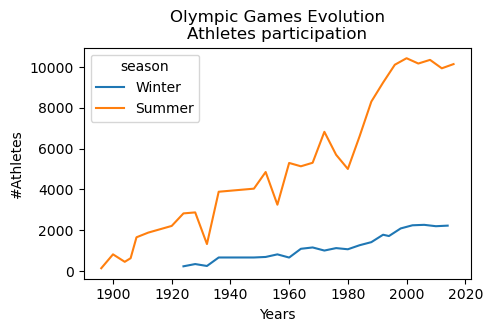

In [42]:
fasegroup = {'$group': {'_id':{'year':'$year', 'season':'$season'}, 
                        'athNo':{'$sum':1}}
            }
fasesort = {'$sort': {'_id.year':-1, '_id.season':1}}
faseproject = {'$project':{'_id':0, 
                           'year':'$_id.year', 
                           'season':'$_id.season', 
                           'athNo':'$athNo'}
              }
athl_cur = db.athl_noc.aggregate([fasegroup, fasesort, faseproject])

# Graficamos
list_cur = list(athl_cur)
df = pd.DataFrame(list_cur)

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', 
                  y = 'athNo', 
                  hue = 'season', 
                  data = df, 
                  hue_order=['Winter', 'Summer'])
gf.set(xlabel = 'Years', ylabel = '#Athletes', 
       title = 'Olympic Games Evolution\nAthletes participation')
plt.show()

##### Eventos

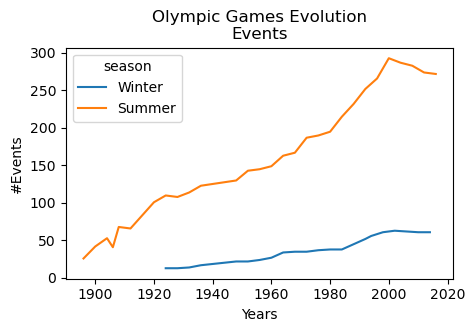

In [45]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasegroup1 = {'$group':{'_id':{'year':'$year', 
                               'season':'$season', 
                               'event':'$sport.event.category'}}}
fasegroup2 = {'$group':{'_id':{'year':'$_id.year', 'season':'$_id.season'}, 
                        'event_no':{'$sum':1}}}
faseproject = {'$project':{'_id':0, 
                           'year':'$_id.year', 
                           'season':'$_id.season', 
                           'event_no':'$event_no'}}
etapas = [faseunwind1, faseunwind2, fasegroup1, fasegroup2, faseproject]
ev_cur = db.athl_noc.aggregate(etapas)

# Graficamos
list_cur = list(ev_cur)
df = pd.DataFrame(list_cur)


fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', 
                  y = 'event_no', 
                  hue = 'season', 
                  data = df, 
                  hue_order=['Winter', 'Summer'])
gf.set(xlabel = 'Years', ylabel = '#Events', 
       title = 'Olympic Games Evolution\nEvents')
plt.show()

##### Países

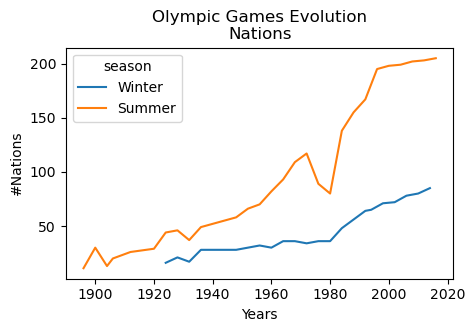

In [48]:
fasegroup1 = {'$group': {'_id':{'year':'$year', 
                                'season':'$season', 
                                'nation':'$nation'}}}
fasegroup2 = {'$group': {'_id':{'year':'$_id.year', 'season':'$_id.season'}, 
                         'nation_no':{'$sum':1}}}
#fasesort = {'$sort': {'_id.year':-1, '_id.season':1}}
faseproject = {'$project':{'_id':0, 
                           'year':'$_id.year', 
                           'season':'$_id.season', 
                           'nation_no':'$nation_no'}}
nat_cur = db.athl_noc.aggregate([fasegroup1, fasegroup2, faseproject])

# Graficamos
list_cur = list(nat_cur)
df = pd.DataFrame(list_cur)

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'nation_no', hue = 'season', data = df, 
                  hue_order=['Winter', 'Summer'])
gf.set(xlabel = 'Years', ylabel = '#Nations', 
       title = 'Olympic Games Evolution\nNations')
plt.show()

#### Evolución de participación por género

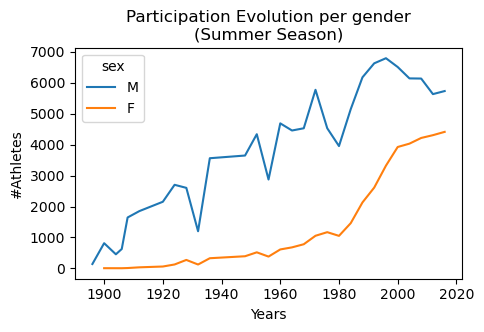

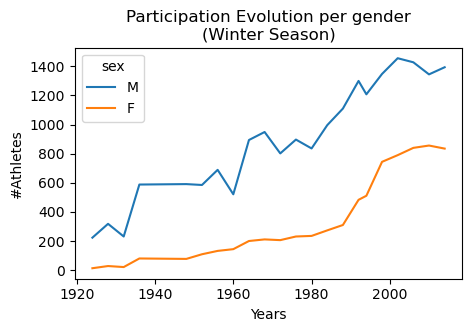

In [49]:
fasegroup = {'$group': {'_id': {'year':'$year', 'season':'$season', 'sex':'$sex'}, 
                        'count':{'$sum':1}}}
faseproject = {'$project':{'_id':0, 
                           'year':'$_id.year', 
                           'season':'$_id.season', 
                           'sex':'$_id.sex', 
                           'count':'$count'}}
fasematchS = {'$match':{'season':'Summer'}}
fasematchW = {'$match':{'season':'Winter'}}
curS = db.athl_noc.aggregate([fasegroup, faseproject, fasematchS])
curW = db.athl_noc.aggregate([fasegroup, faseproject, fasematchW])

# Graficamos
list_curS = list(curS)
dfS = pd.DataFrame(list_curS)
list_curW = list(curW)
dfW = pd.DataFrame(list_curW)

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'count', hue = 'sex', data = dfS, 
                  hue_order=['M', 'F'])
gf.set(xlabel = 'Years', ylabel = '#Athletes', 
       title = 'Participation Evolution per gender\n(Summer Season)')
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'count', hue = 'sex', data = dfW, 
                  hue_order=['M', 'F'])
gf.set(xlabel = 'Years', ylabel = '#Athletes', 
       title = 'Participation Evolution per gender\n(Winter Season)')
plt.show()

#### Medallas por género

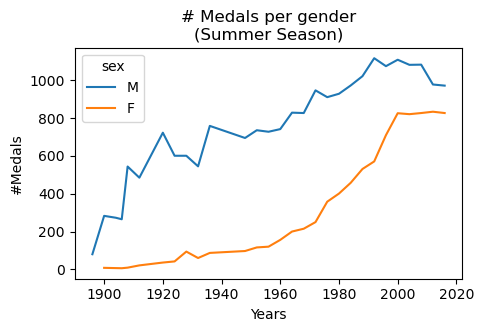

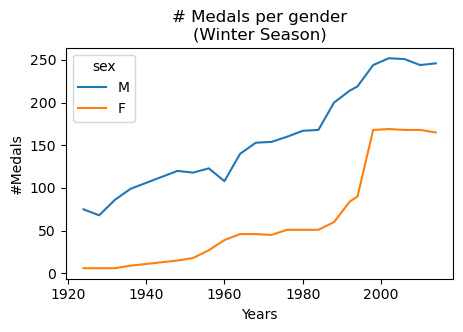

In [51]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasematch = {'$match': {'sport.event.medal':{'$regex': '(Gold|Silver|Bronze)'}}}
fasegroup1 = {'$group': {'_id':
                             {'year':'$year', 
                              'season':'$season',
                              'medal':'$sport.event.medal', 
                              'sex':'$sex'}, 
                         'events':{'$sum':1}
                        }
             }
fasegroup2 = {'$group': {'_id':
                             {'year':'$_id.year', 
                              'season':'$_id.season',
                              'sex':'$_id.sex'}, 
                         'medals':{'$sum':'$events'}
                        }
             }

faseproject = {'$project':
                   {'_id':0, 
                    'year':'$_id.year', 
                    'season':'$_id.season',
                    'sex':'$_id.sex',
                    'medals':'$medals'
                   }
              }
fasematchS = {'$match':{'season':'Summer'}}
fasematchW = {'$match':{'season':'Winter'}}
etapaS = [faseunwind1, faseunwind2, fasematch, fasegroup1, fasegroup2, faseproject, fasematchS]
etapaW = [faseunwind1, faseunwind2, fasematch, fasegroup1, fasegroup2, faseproject, fasematchW]
curS = db.athl_noc.aggregate(etapaS)
curW = db.athl_noc.aggregate(etapaW)

list_curS = list(curS)
dfS = pd.DataFrame(list_curS)
list_curW = list(curW)
dfW = pd.DataFrame(list_curW)

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'medals', hue = 'sex', data = dfS, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = '#Medals', title = '# Medals per gender\n(Summer Season)')
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'medals', hue = 'sex', data = dfW, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = '#Medals', title = '# Medals per gender\n(Winter Season)')
plt.show()

#### Top 10 paises con más medallas en la historia de las Juegos Olímpicos

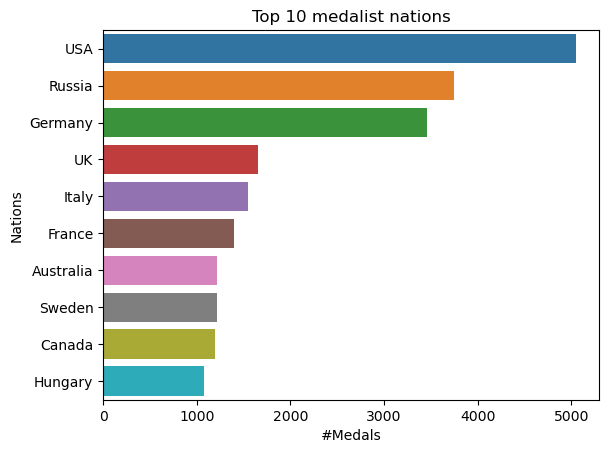

In [52]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasematch = {'$match': {'sport.event.medal':{'$regex': '(Gold|Silver|Bronze)'}}}
fasegroup = {'$group': {'_id':'$nation', 'medal_no':{'$sum':1}}}
fasesort = {'$sort': {'medal_no':-1}}
faselimit = {'$limit':10}
faseproject = {'$project':{'_id':0, 'nation':'$_id', 'medals':'$medal_no'}}
etapas = [faseunwind1, faseunwind2, fasematch, fasegroup, fasesort, faselimit, faseproject]
cur = db.athl_noc.aggregate(etapas)

list_cur = list(cur)
df = pd.DataFrame(list_cur)

gf = sns.barplot(x = 'medals', y = 'nation', data = df)
gf.set(xlabel = '#Medals', ylabel = 'Nations', title = 'Top 10 medalist nations')
plt.show()

#### Top 10 medallistas en la historia de los Juegos Olímpicos

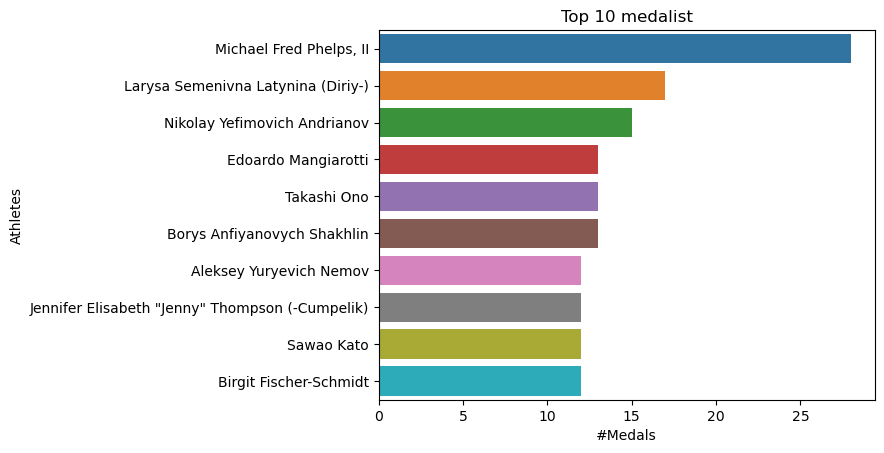

In [53]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasematch = {'$match': {'sport.event.medal':{'$regex': '(Gold|Silver|Bronze)'}} }
fasegroup = {'$group': {'_id':{'athId':'$athId', 'name':'$name'}, 'medal_no':{'$sum':1}}}
fasesort = {'$sort': {'medal_no':-1}}
faselimit = {'$limit':10}
faseproject = {'$project': {'_id':0, 'name':'$_id.name', 'medals':'$medal_no'}}
etapas = [faseunwind1, faseunwind2, fasematch, fasegroup, fasesort, faselimit, faseproject]
cur = db.athl_noc.aggregate(etapas)

list_cur = list(cur)
df = pd.DataFrame(list_cur)

gf = sns.barplot(x = 'medals', y = 'name', data = df)
gf.set(xlabel = '#Medals', ylabel = 'Athletes', title = 'Top 10 medalist')
plt.show()

#### Top 5 de atletas con más participaciones en los JJOO (la carrera más larga)

In [55]:
fasegroup = {'$group': {'_id':
                            {'athId':'$athId', 
                             'name':'$name', 
                             'nation':'$nation'}, 
                        'editions':{'$sum':1}, 
                        'start':{'$min':'$year'}, 
                        'end':{'$max':'$year'}}}
faseadd = {'$addFields': {'duration': { '$subtract': [ '$end', '$start' ]} } }
fasesort = {'$sort': {'editions':-1}}
faselimit = {'$limit':5}
faseproject = {'$project':{'_id':0, 
                           'name':'$_id.name', 
                           'nation':'$_id.nation', 
                           'editions':'$editions', 
                           'start':'$start', 
                           'end':'$end',
                           'duration':'$duration'
                          }
              }
cur = db.athl_noc.aggregate([fasegroup, faseadd, fasesort, faselimit, faseproject])

list_cur = list(cur)
df = pd.DataFrame(list_cur)
df

,name,nation,editions,start,end,duration
0,Ian Millar,Canada,10,1972,2012,40
1,Hubert Raudaschl,Austria,9,1964,1996,32
2,Raimondo D'Inzeo,Italy,8,1948,1976,28
3,Piero D'Inzeo,Italy,8,1948,1976,28
4,Paul Bert Elvstrm,Denmark,8,1948,1988,40


#### Evolución de edad/peso/altura de los atletas a través de los años

In [56]:
fasegroup = {'$group': {'_id':{'year':'$year', 'season':'$season', 'sex':'$sex'}, 
                        'age':{'$avg': '$age'}, 
                        'height':{'$avg': '$height'},
                        'weight':{'$avg': '$weight'}
                       }
            }
faseproject = {'$project':{'_id':0, 
                           'year':'$_id.year', 
                           'season':'$_id.season',
                           'sex':'$_id.sex', 
                           'age':'$age', 
                           'height':'$height', 
                           'weight':'$weight'
                          }
              }
fasematchS = {'$match': {'season':'Summer'}}
fasematchW = {'$match': {'season':'Winter'}}
curS = db.athl_noc.aggregate([fasegroup, faseproject, fasematchS])
curW = db.athl_noc.aggregate([fasegroup, faseproject, fasematchW])

list_curS = list(curS)
dfS = pd.DataFrame(list_curS)
list_curW = list(curW)
dfW = pd.DataFrame(list_curW)

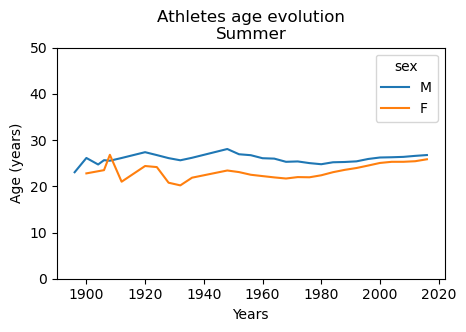

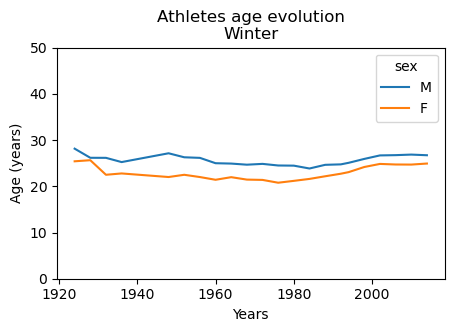

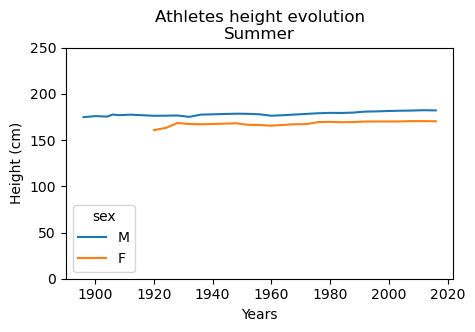

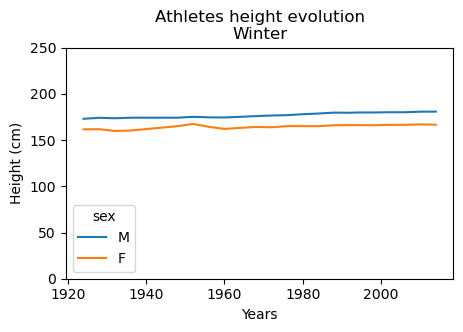

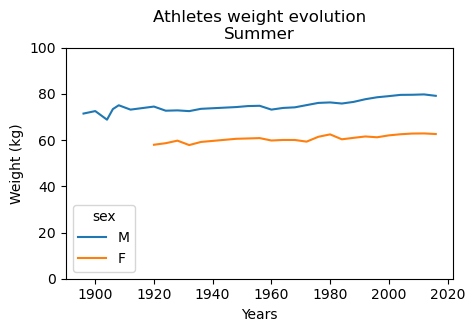

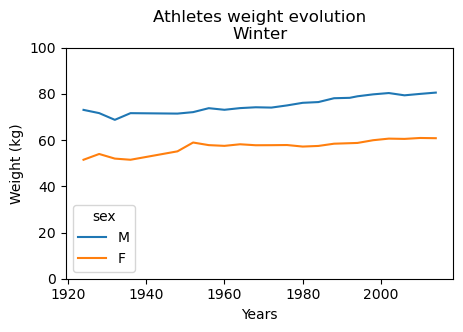

In [74]:
# Gráficos
# Age
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'age', hue = 'sex', data = dfS, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = 'Age (years)', title = 'Athletes age evolution\nSummer')
gf.set(ylim=(0, 50))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'age', hue = 'sex', data = dfW, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = 'Age (years)', title = 'Athletes age evolution\nWinter')
gf.set(ylim=(0, 50))
plt.show()

# Height
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'sex', data = dfS, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = 'Height (cm)', title = 'Athletes height evolution\nSummer')
gf.set(ylim=(0, 250))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'sex', data = dfW, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = 'Height (cm)', title = 'Athletes height evolution\nWinter')
gf.set(ylim=(0, 250))
plt.show()

# Weight
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'sex', data = dfS, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = 'Weight (kg)', title = 'Athletes weight evolution\nSummer')
gf.set(ylim=(0, 100))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'sex', data = dfW, hue_order = ['M', 'F'])
gf.set(xlabel = 'Years', ylabel = 'Weight (kg)', title = 'Athletes weight evolution\nWinter')
gf.set(ylim=(0, 100))
plt.show()

#### Relación de la edad/peso/altura con ser medallista/no medallista

In [77]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
faseproject1 = {'$project': {'year': '$year', 
                             'season':'$season', 
                             'sex': '$sex', 
                             'age': '$age', 
                             'height': '$height', 
                             'weight': '$weight',
                            'medalist': { '$in': ['$sport.event.medal', ['Gold', 'Silver', 'Bronze']]}}}
fasegroup = {'$group': {'_id':{'year': '$year', 'season':'$season', 'sex': '$sex', 'medalist': '$medalist'}, 
                            'age': {'$avg':'$age'}, 
                            'height': {'$avg':'$height'}, 
                            'weight': {'$avg':'$weight'}}}
faseproject2 = {'$project':{'_id':0, 
                            'year':'$_id.year',
                            'season':'$_id.season',
                            'sex':'$_id.sex', 
                            'medalist':'$_id.medalist', 
                            'age':'$age', 
                            'height':'$height', 
                            'weight':'$weight'}}
fasefilterMS = {'$match':{'sex':'M', 'season':'Summer'}}
fasefilterMW = {'$match':{'sex':'M', 'season':'Winter'}}
fasefilterFS = {'$match':{'sex':'F', 'season':'Summer'}}
fasefilterFW = {'$match':{'sex':'F', 'season':'Winter'}}
curMS = db.athl_noc.aggregate([faseunwind1, faseunwind2, faseproject1, fasegroup, faseproject2, fasefilterMS])
curMW = db.athl_noc.aggregate([faseunwind1, faseunwind2, faseproject1, fasegroup, faseproject2, fasefilterMW])
curFS = db.athl_noc.aggregate([faseunwind1, faseunwind2, faseproject1, fasegroup, faseproject2, fasefilterFS])
curFW = db.athl_noc.aggregate([faseunwind1, faseunwind2, faseproject1, fasegroup, faseproject2, fasefilterFW])

list_curMS = list(curMS)
dfMS = pd.DataFrame(list_curMS)
list_curMW = list(curMW)
dfMW = pd.DataFrame(list_curMW)

list_curFS = list(curFS)
dfFS = pd.DataFrame(list_curFS)
list_curFW = list(curFW)
dfFW = pd.DataFrame(list_curFW)

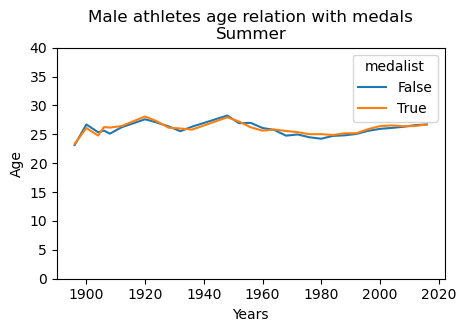

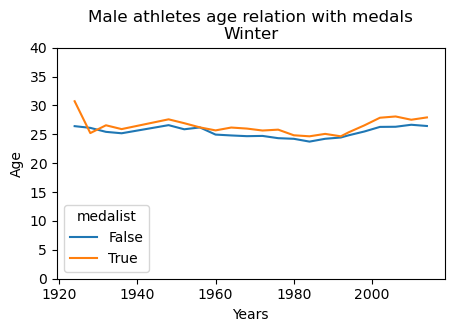

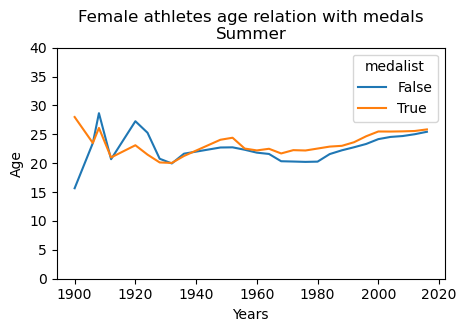

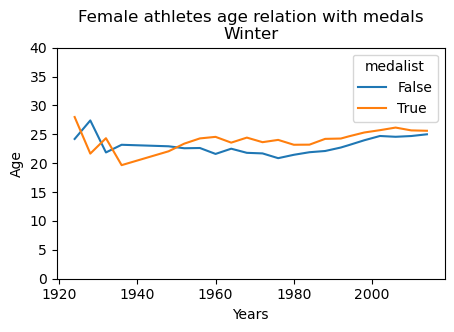

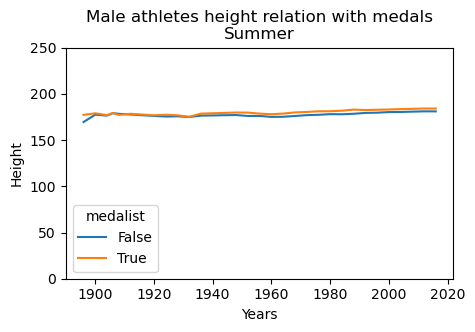

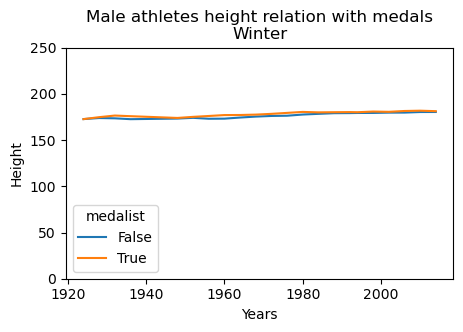

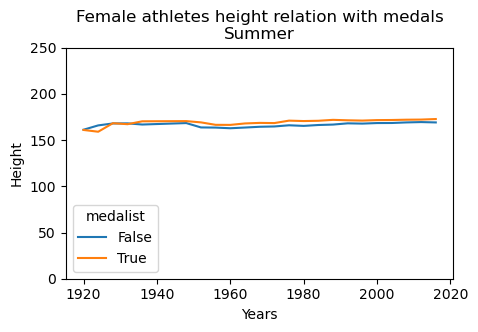

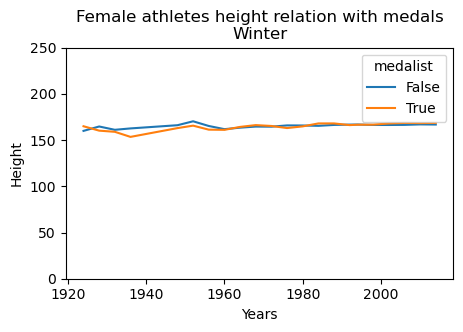

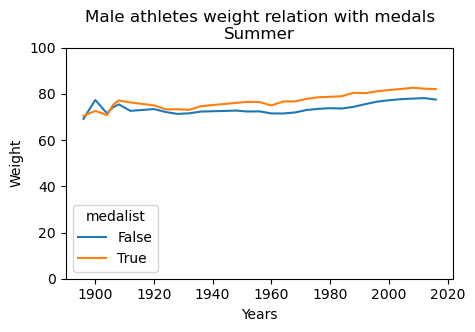

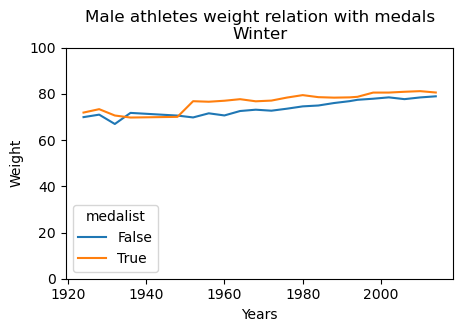

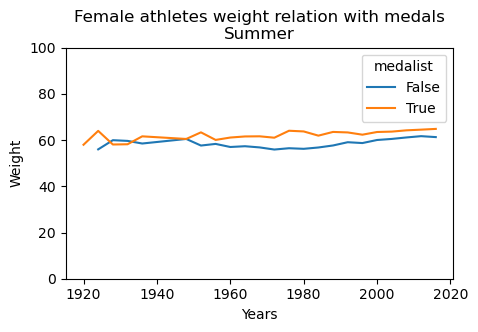

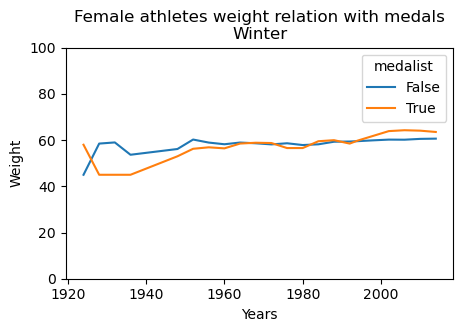

In [79]:
# Gráficos
# Age
## Male
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'age', hue = 'medalist', data = dfMS)
gf.set(xlabel = 'Years', ylabel = 'Age', title = 'Male athletes age relation with medals\nSummer')
gf.set(ylim=(0, 40))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'age', hue = 'medalist', data = dfMW)
gf.set(xlabel = 'Years', ylabel = 'Age', title = 'Male athletes age relation with medals\nWinter')
gf.set(ylim=(0, 40))
plt.show()

## Female
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'age', hue = 'medalist', data = dfFS)
gf.set(xlabel = 'Years', ylabel = 'Age', title = 'Female athletes age relation with medals\nSummer')
gf.set(ylim=(0, 40))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'age', hue = 'medalist', data = dfFW)
gf.set(xlabel = 'Years', ylabel = 'Age', title = 'Female athletes age relation with medals\nWinter')
gf.set(ylim=(0, 40))
plt.show()

# Height
## Male
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'medalist', data = dfMS)
gf.set(xlabel = 'Years', ylabel = 'Height', title = 'Male athletes height relation with medals\nSummer')
gf.set(ylim=(0, 250))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'medalist', data = dfMW)
gf.set(xlabel = 'Years', ylabel = 'Height', title = 'Male athletes height relation with medals\nWinter')
gf.set(ylim=(0, 250))
plt.show()

## Female
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'medalist', data = dfFS)
gf.set(xlabel = 'Years', ylabel = 'Height', title = 'Female athletes height relation with medals\nSummer')
gf.set(ylim=(0, 250))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'medalist', data = dfFW)
gf.set(xlabel = 'Years', ylabel = 'Height', title = 'Female athletes height relation with medals\nWinter')
gf.set(ylim=(0, 250))
plt.show()

# Weight
## Male
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'medalist', data = dfMS)
gf.set(xlabel = 'Years', ylabel = 'Weight', title = 'Male athletes weight relation with medals\nSummer')
gf.set(ylim=(0, 100))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'medalist', data = dfMW)
gf.set(xlabel = 'Years', ylabel = 'Weight', title = 'Male athletes weight relation with medals\nWinter')
gf.set(ylim=(0, 100))
plt.show()

## Female
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'medalist', data = dfFS)
gf.set(xlabel = 'Years', ylabel = 'Weight', title = 'Female athletes weight relation with medals\nSummer')
gf.set(ylim=(0, 100))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'medalist', data = dfFW)
gf.set(xlabel = 'Years', ylabel = 'Weight', title = 'Female athletes weight relation with medals\nWinter')
gf.set(ylim=(0, 100))
plt.show()

#### Comparación de altura y peso entre tipos de disciplinas

In [81]:
faseunwind = {'$unwind': '$sport'}
fasematch = {'$match': {'sport.sport':{'$regex': ('Athletics|Gymnastics|Ice Hockey|Hockey|Weightlifting'), '$options':'i'}}}
faseproject1 = {'$project': {'year':'$year', 'season':'$season', 'sex': '$sex', 'height': '$height', 'weight': '$weight',
                            'strength': { '$in': ['$sport.sport', ['Ice Hockey', 'Hockey', 'Weightlifting']]}
                            
                    }
fasegroup = {'$group': {'_id':{'year':'$year', 'season':'$season','sex': '$sex', 'strength': '$strength'}, 
                            'height': {'$avg':'$height'}, 
                            'weight': {'$avg':'$weight'}
                        }
                }
faseproject2 = {'$project':{'_id':0, 
                            'year':'$_id.year', 
                            'season':'$_id.season',
                            'sex':'$_id.sex', 
                            'strength':'$_id.strength', 
                            'height':'$height', 
                            'weight':'$weight'
                          }
              }
fasefilter = {'$match':{'season':'Summer'}}
fasefilterM = {'$match':{'sex':'M'}}
fasefilterF = {'$match':{'sex':'F'}}
curM = db.athl_noc.aggregate([faseunwind, fasematch, faseproject1, fasegroup, faseproject2, fasefilter, fasefilterM])
curF = db.athl_noc.aggregate([faseunwind, fasematch, faseproject1, fasegroup, faseproject2, fasefilter, fasefilterF])

list_curM = list(curM)
dfM = pd.DataFrame(list_curM)

list_curF = list(curF)
dfF = pd.DataFrame(list_curF)

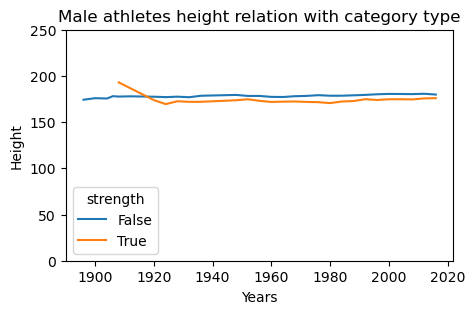

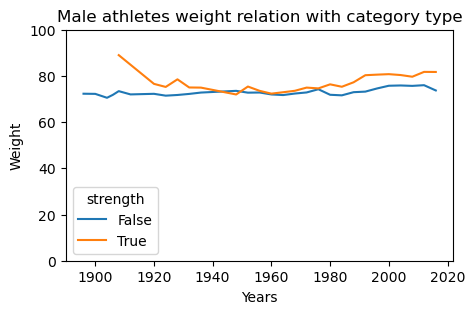

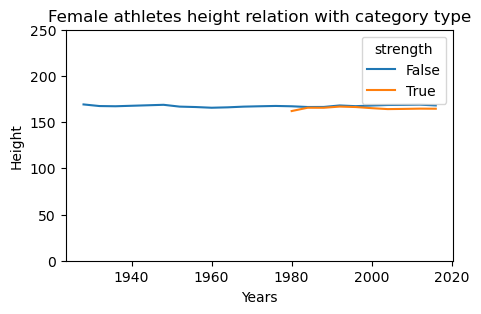

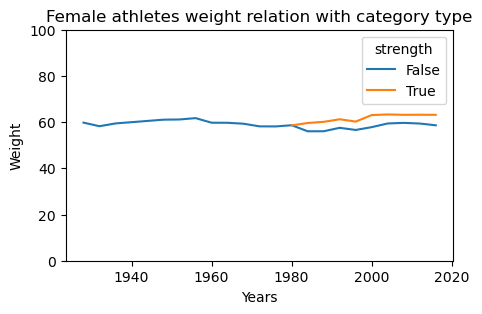

In [83]:
# Gráficos
# Men
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'strength', data = dfM)
gf.set(xlabel = 'Years', ylabel = 'Height', title = 'Male athletes height relation with category type')
gf.set(ylim=(0, 250))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'strength', data = dfM)
gf.set(xlabel = 'Years', ylabel = 'Weight', title = 'Male athletes weight relation with category type')
gf.set(ylim=(0, 100))
plt.show()

# Women
fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'height', hue = 'strength', data = dfF)
gf.set(xlabel = 'Years', ylabel = 'Height', title = 'Female athletes height relation with category type')
gf.set(ylim=(0, 250))
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
gf = sns.lineplot(x = 'year', y = 'weight', hue = 'strength', data = dfF)
gf.set(xlabel = 'Years', ylabel = 'Weight', title = 'Female athletes weight relation with category type')
gf.set(ylim=(0, 100))
plt.show()

#### Top 10 de deportes con más disciplinas en la historia de los JJOO

In [84]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasegroup1 = {'$group': {'_id':{'sport':'$sport.sport', 'event':'$sport.event.category'}}}
fasegroup2 = {'$group': {'_id':'$_id.sport', 'cat_no':{'$sum':1}, 'categories':{'$push':'$_id.event'}}}
fasesort = {'$sort': {'cat_no':-1}}
faselimit = {'$limit':10}
faseproject = {'$project':{'_id':0, 'sport':'$_id', 'cat_no':'$cat_no', 'categories':'$categories'}}
cur = db.athl_noc.aggregate([faseunwind1, faseunwind2, fasegroup1, fasegroup2, fasesort, faselimit, faseproject])

list_cur = list(cur)
df = pd.DataFrame(list_cur)
df

,sport,cat_no,categories
0,Athletics,51,"[Athletics Women's 10,000 metres, Athletics Wo..."
1,Swimming,32,"[Swimming Women's 800 metres Freestyle, Swimmi..."
2,Wrestling,20,"[Wrestling Men's Light-Heavyweight, Freestyle,..."
3,Shooting,19,"[Shooting Men's Rapid-Fire Pistol, 25 metres, ..."
4,Weightlifting,18,"[Weightlifting Women's Featherweight, Weightli..."
5,Cycling,18,"[Cycling Men's Keirin, Cycling Women's Road Ra..."
6,Rowing,16,"[Rowing Men's Single Sculls, Rowing Men's Ligh..."
7,Canoeing,16,"[Canoeing Women's Kayak Fours, 500 metres, Can..."
8,Gymnastics,15,"[Gymnastics Men's Pommelled Horse, Gymnastics ..."
9,Judo,15,"[Judo Women's Half-Heavyweight, Judo Men's Ope..."


#### Las disciplinas que han permanecido por más tiempo

In [85]:
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasegroup1 = {'$group': {'_id':{'category':'$sport.event.category', 'year':'$year'}}}
fasegroup2 = {'$group': {'_id':'$_id.category', 'count':{'$sum':1}}}
fasegroup3 = {'$group': {'_id':'$count', 'cat': {'$push': '$_id'}}}
fasesort = {'$sort': {'_id':-1}}
faselimit = {'$limit': 1}
faseunwind3 = {'$unwind': '$cat'}
faseproject = {'$project': {'_id': 0, 'category': '$cat', 'editions':'$_id'}}
etapas = [faseunwind1, faseunwind2, fasegroup1, fasegroup2, fasegroup3, fasesort, faselimit, faseunwind3, faseproject]
cur = db.athl_noc.aggregate(etapas)

list_cur = list(cur)
df = pd.DataFrame(list_cur)
df

,category,editions
0,Athletics Men's 100 metres,29
1,"Athletics Men's 1,500 metres",29
2,Athletics Men's 400 metres,29
3,Athletics Men's High Jump,29
4,Athletics Men's Pole Vault,29
5,Athletics Men's Triple Jump,29
6,Athletics Men's 800 metres,29
7,"Fencing Men's Sabre, Individual",29
8,Athletics Men's Marathon,29
9,Athletics Men's Shot Put,29


#### Top disciplina con medallas por país

In [87]:
faseunwind1 = {'$unwind':'$sport'}
faseunwind2 = {'$unwind':'$sport.event'}
fasematch = {'$match': {'sport.event.medal':{'$regex': '(Gold|Silver|Bronze)'}}}
fasegroup1 = {'$group': {'_id':{'nation':'$nation', 'category':'$sport.event.category'}, 'medals':{'$sum':1}}}
fasesort1 = {'$sort': {'_id.nation':1, 'medals':-1}}
fasegroup2 = {'$group': {'_id':'$_id.nation', 'category':{'$first':'$_id.category'}, 'medals':{'$first': "$medals"}}}
faseproject = {'$project':{'_id':0, 'nation':'$_id', 'category':'$category', 'medals':'$medals'}}
fasesort2 = {'$sort': {'medals':-1}}
etapas = [faseunwind1, faseunwind2, fasematch, fasegroup1, fasesort1, fasegroup2, faseproject, fasesort2]
cur = db.athl_noc.aggregate(etapas)

list_cur = list(cur)
df = pd.DataFrame(list_cur)
df

,nation,category,medals
0,Canada,Ice Hockey Men's Ice Hockey,247
1,Russia,Ice Hockey Men's Ice Hockey,233
2,USA,Basketball Men's Basketball,222
3,Czech Republic,Ice Hockey Men's Ice Hockey,184
4,Germany,Hockey Men's Hockey,183
...,...,...,...
127,Syria,"Wrestling Men's Flyweight, Greco-Roman",1
128,Guatemala,Athletics Men's 20 kilometres Walk,1
129,Iraq,Weightlifting Men's Lightweight,1
130,Senegal,Athletics Men's 400 metres Hurdles,1


#### Top 10 disciplinas con medallas de España

In [89]:
fasematch1 = {'$match': {'nation':'Spain'}}
faseunwind1 = {'$unwind': '$sport'}
faseunwind2 = {'$unwind': '$sport.event'}
fasematch2 = {'$match': {'sport.event.medal':{'$regex': '(Gold|Silver|Bronze)'}} }
fasegroup = {'$group': {'_id':'$sport.event.category', 'medal_no':{'$sum':1}}}
fasesort = {'$sort': {'medal_no':-1}}
faselimit = {'$limit':10}
faseproject = {'$project': {'_id':0, 'category':'$_id', 'medals':'$medal_no'}}
etapas = [fasematch1, faseunwind1, faseunwind2, fasematch2, fasegroup, fasesort, faselimit, faseproject]
cur = db.athl_noc.aggregate(etapas)

list_cur = list(cur)
df = pd.DataFrame(list_cur)
df

,category,medals
0,Hockey Men's Hockey,62
1,Football Men's Football,52
2,Basketball Men's Basketball,48
3,Handball Men's Handball,45
4,Water Polo Men's Water Polo,24
5,Synchronized Swimming Women's Team,16
6,Hockey Women's Hockey,15
7,Handball Women's Handball,15
8,Water Polo Women's Water Polo,12
9,Basketball Women's Basketball,12


#### Cierre de la conexión

In [90]:
client.close()